### ch2. ANN

- 학습 날짜 : 2019 07 - 01

### 2.1 ANN 원리

### 2.2 필기체를 구분하는 분류 ANN 구현

### 2.2.1 분류 ANN을 위한 인공지능 모델 구현

#### ANN 구현 6단계


1. 분류 ANN 구현용 패키지 불러오기
2. 분류 ANN에 필요한 파라미터 설정
3. 분류 ANN 모델 구현
4. 학습과 성능 평가용 데이터 불러오기
5. 분류 ANN 학습 및 검증
6. 분류 ANN 학습 결과 분석

#### 1단계
- layers : 각 계층을 만드는 모듈
- models : 각 layers들을 연결하여 신경망 모델을 만든 후, 컴파일하고, 학습시키는 역할

In [1]:
from keras import layers, models

Using TensorFlow backend.


#### 2단계
ANN에 필요한 파라미터 설정

- Nin : 노드 수
- Nh : 은닉 계층의 노드 수
- number_of_class : 출력값이 가질 클래스 수
- Nout : 출력 노드 수

#### 3단계
얀쇄 방식과 분산 방식으로 구현 가능

- 연쇄 방식 : 간단히 구현 할 수 있지만, 복잡도가 높은 모델에 적용하기에는 한계
- 이 책에서는 분산 방식 모델링(함수형, 객체지향형), 연쇄 방식 모델링(함수형, 객체지향형) 을 다룰 예정

In [2]:
# 분산 방식으로 구현, 함수형 방식

# 입력 계층
x = layers.Input(shape=(Nin,))

# 은닉 계층의 구조와 수
h = layers.Activation('relu')(layers.Dense(Nh)(x))

# 출력 계층
# 다중 클래스 분류를 ANN으로 구현하므로 출력 노드 수는 클래스 수로 지정(추력 노드에 입력 되는 정보는 은닉 노드의 출력값)
y = layers.Activation('softmax')(layers.Dense(Nout)(h))

NameError: name 'Nin' is not defined

In [ ]:
# 모델 구현, 중간 계층은 알아서 자동 설정

model = models.Model(x, y)

In [ ]:
# model compile 과정

model.compile(
    loss='categorical_crossentropy', # loss function 지정
    optimizer='adim',   # 최적화 함수 지정
    metrics=['accuracy']   # 학습, 예측 및 성능 검증의 정확성 측정
)

### 연쇄 방식 모델링을 포함하는 함수형 구현

In [3]:
model = models.Sequential()

W0630 15:56:29.656615 140591263082304 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



In [ ]:
# 첫 번째 add : 입력 계층과 은닉 계층의 형태가 동시에 정해짐
# 입력 노트 Nin개는 완전 연결 계층 Nh개로 구성된 은닉 계층으로 보내짐
# 두 번째 add :은닉 계층의 출력이 출력이 nout인 출력 노드로 전달, 활성화 함수는 softmax

model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin, )))
model.add(layers.Dense(Nout, activation='softmax'))

### 분산 방식 모델링을 포함하는 객체지향형 구현

In [30]:
class ANN_models_class(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')
        softmax = layers.Activation('softmax')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = softmax(output(h))

        super().__init__(x, y) # 상속 받은 부모 클래스의 초기화 진행
        self.compile(loss='categorical_crossentropy',
                     optimizer='adam', metrics=['accuracy'])

### 연쇄 방식 모델링을 포함하는 객체지향형 구현

In [2]:
class ANN_seq_class(models.Sequential):
    def __init__(self, Nin, Nh, Nout):
        super().__init__()
        
        self.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
        self.add(layers.Dense(Nout, activation='softmax'))
        self.compile(
            loss='categorical_crossentropy',
            optimizer='adam', 
            metrics=['accuracy']
        )

### 2.2.2 분류 ANN에 사용할 데이터 불러오기

1. 데이터 처리에 사용할 패키지 임포트
2. 데이터 불러오기
3. 출력값 변수를 이진 벡터 형태로 바꾸기
4. 이미지를 나타내는 아규먼트를 1차원 벡터 형태로 바꾸기
5. ANN을 위해 입력값들을 정규화 하기

In [3]:
# load data

import numpy as np
from keras import datasets #mnist
from keras.utils import np_utils #to_categorical

In [4]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [5]:
# 0부터 0까지의 숫자로 구성된 출력갑승 ㄹ0과 1로 표현되는 벡터 10개로 바꾸기

Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

# why?
# 분류 작업 시 정수보다 이진 벡터로 출력 변수를 구성하는 것이 효율적

In [6]:
# X_train, X_test에 (x, y)축에 대한 픽셀 정보가 들어 있는 3차원 데이터인 실제 학습 및 평가용 이미지를 2차원으로 조정

L, W, H = X_train.shape
X_train = X_train.reshape(-1, W*H)
X_test = X_test.reshape(-1, W*H)

In [7]:
# 학습 데이터 셋 샘플 L개
# L * W * H의 텐서로 저장된 상태
# 멤버 변수 shape에는 2D 이미지 데이터를 저장하는 저장소 규격 있음, 이를 ANN으로 학습하려면 벡터 이미지 형태로 변경, reshape사용
# -1은 행렬의 행을 자동으로 설정

In [8]:
# ANN 최적화를 위한 아규먼트

X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
def Data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)

    L, W, H = X_train.shape
    X_train = X_train.reshape(-1, W * H)
    X_test = X_test.reshape(-1, W * H)

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return (X_train, Y_train), (X_test, Y_test)

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
def plot_loss(history):
    plt.plot(history.history['loss'])  # 실제 학습 데이터로 구한 손실값
    plt.plot(history.history['val_loss']) # 학습 데이터 일부를 사용한 검증 데이터로 구한 손실 값
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

In [12]:
def plot_acc(history):
    plt.plot(history.history['acc'])  # 실제 학습 데이터로 구한 손실값
    plt.plot(history.history['val_acc']) # 학습 데이터 일부를 사용한 검증 데이터로 구한 손실 값
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)

### 2.2.4 분류 ANN 학습 및 성능 분석

In [13]:
def main():
    Nin = 784 # 입력 Nin
    Nh = 100 # 은닉 계층 노드 수
    number_of_class = 10 # 분류 할 갯수(classification)
    Nout = number_of_class # 출력 할 값
    
    model = ANN_seq_class(Nin, Nh, Nout)
    (X_train, Y_train), (X_test, Y_test) = Data_func()
    
    history = model.fit(
        X_train, 
        Y_train, 
        epochs=5, 
        batch_size=100, 
        validation_split=0.2
    )
    
    
    # model 평가

    performance_test = model.evaluate(X_test, Y_test, batch_size=100)
    print('Test Loss and Accuracy ->', performance_test)
    
    plot_loss(history)
    plt.show()
    
    plot_acc(history)
    plt.show()

W0630 16:47:36.681868 139670238701376 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0630 16:47:36.704388 139670238701376 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0630 16:47:36.763573 139670238701376 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0630 16:47:36.787494 139670238701376 deprecation_wrapper.py:119] From /opt/conda/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0630 16:47:36.806253 139670238701376 deprecation_wrappe

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 34us/step - loss: 0.3951 - acc: 0.8898 - val_loss: 0.2195 - val_acc: 0.9388
Epoch 2/5
48000/48000 [==============================] - 1s 27us/step - loss: 0.1906 - acc: 0.9453 - val_loss: 0.1590 - val_acc: 0.9566
Epoch 3/5
48000/48000 [==============================] - 1s 28us/step - loss: 0.1404 - acc: 0.9598 - val_loss: 0.1347 - val_acc: 0.9609
Epoch 4/5
48000/48000 [==============================] - 1s 27us/step - loss: 0.1109 - acc: 0.9690 - val_loss: 0.1174 - val_acc: 0.9653
Epoch 5/5
10000/10000 [==============================] - 0s 10us/step
Test Loss and Accuracy -> [0.10633875235565939, 0.9680000048875809]


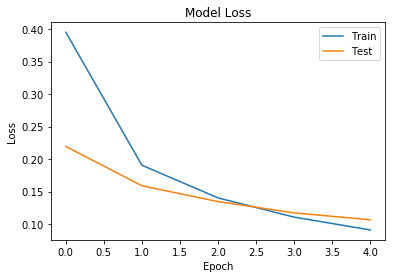

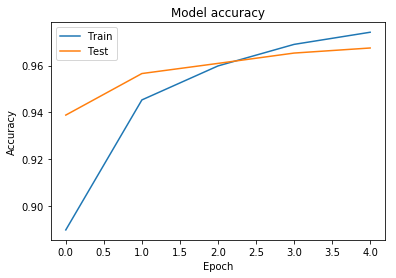

In [14]:
main()

### 각 출력문의 의미

Train on 48000 samples, validate on 12000 samples
- 학습에 주어진 샘플 60,000개 중에서 48,000개가 실제 학습에 사용되고 12,000개가 검증에 사용되었습니다.

Epoch 1/5
- 5번의 학습에서 첫 번째 단계 학습이 완료되었습니다.

2s
- 학습에 걸린 시간이 2초입니다.

loss : 0.3916
- 학습 데이터로 평가한 성능 손실(loss)이 0.3916입니다.
- loss는 손실 함수로 구한 오류율 입니다.

acc : 0.8913
- 정확도(acc), acc는 정확히 예측했을 경우 최댓값 1을 가지는 평가값

val_loss: 0.2068 - val_acc: 0.9431
- val_loss와 val_acc는 검증 데이터로 측정한 손실과 정확도를 나타냅니다.

- 그래프를 보고 hyperparameter 조정 가능

-----------------------------------

### 2.3 시계열 데이터를 예측하는 회귀 ANN 구현

1. 회귀 ANN 구현
2. 학습과 평가용 데이터 불러오기
3. 회귀 ANN 학습 및 성능 평가
4. 회귀 ANN 학습 결과 분석

#### 2.3.1 회귀 ANN 모델링

In [16]:
from keras import layers, models
from sklearn import preprocessing

In [33]:
class ANN(models.Model):
    def __init__(self, Nin, Nh, Nout):
        # Prepare network layers and activate functions
        hidden = layers.Dense(Nh)
        output = layers.Dense(Nout)
        relu = layers.Activation('relu')

        # Connect network elements
        x = layers.Input(shape=(Nin,))
        h = relu(hidden(x))
        y = output(h)

        super().__init__(x, y)

        self.compile(loss='mse', optimizer='sgd')

- 입력에 해당하는 x는 Nin 길이를 가지는 1차원 열 벡터
- 은칙 계층은 입력 계층의 신호인 x가 hidden()을 통과한 뒤 다시 활성화 함수인 relu() 단계를 통과하도록 구성
  - 그 결과 h는 최종적으로 output으로 정의된 계층에 들어감
- 출력은 활성화 함수 없이 바로 y로 나옵니다.

#### 2.3.2 학습과 평가용 데이터 불러오기

In [34]:
from keras import datasets

In [35]:
def data_func():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    
    scaler = preprocessing.MinMaxScaler() # 0과 1로 정규화 해주는 MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return (X_train, y_train), (X_test, y_test)

#### 2.3.3 회귀 ANN학습 결과 그래프 구현

Train on 323 samples, validate on 81 samples
Epoch 1/100
 - 0s - loss: 549.2299 - val_loss: 544.1247
Epoch 2/100
 - 0s - loss: 390.5700 - val_loss: 103.3929
Epoch 3/100
 - 0s - loss: 98.1901 - val_loss: 85.2140
Epoch 4/100
 - 0s - loss: 77.4438 - val_loss: 81.0683
Epoch 5/100
 - 0s - loss: 66.6654 - val_loss: 61.9228
Epoch 6/100
 - 0s - loss: 61.4270 - val_loss: 65.4058
Epoch 7/100
 - 0s - loss: 71.9419 - val_loss: 58.9549
Epoch 8/100
 - 0s - loss: 51.9858 - val_loss: 93.1045
Epoch 9/100
 - 0s - loss: 62.5920 - val_loss: 62.6678
Epoch 10/100
 - 0s - loss: 47.1879 - val_loss: 53.1253
Epoch 11/100
 - 0s - loss: 42.8130 - val_loss: 49.0748
Epoch 12/100
 - 0s - loss: 40.8272 - val_loss: 41.4224
Epoch 13/100
 - 0s - loss: 38.3668 - val_loss: 54.4867
Epoch 14/100
 - 0s - loss: 42.8160 - val_loss: 41.1169
Epoch 15/100
 - 0s - loss: 40.6437 - val_loss: 44.5766
Epoch 16/100
 - 0s - loss: 34.1632 - val_loss: 44.1284
Epoch 17/100
 - 0s - loss: 32.6141 - val_loss: 35.6701
Epoch 18/100
 - 0s - loss

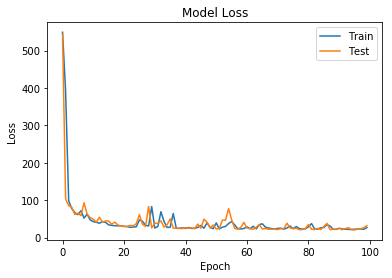

In [37]:
def main():
    Nin = 13
    Nh = 5
    Nout = 1
    
    model = ANN(Nin, Nh, Nout)
    
    (X_train, y_train), (X_test, y_test) = data_func()
    
    history = model.fit(
        X_train, 
        y_train, 
        epochs=100, 
        batch_size=100, 
        validation_split=0.2, 
        verbose=2
    )
    
    performance_test = model.evaluate(X_test, y_test, batch_size=100)
    print('\nTest Loss -> {:.2f}'.format(performance_test))

    plot_loss(history)
    plt.show()
    
if __name__=="__main__":
    main()